In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import math

import sklearn
from sklearn import neighbors

In [2]:
#Note Berkeley Stations:
#Ashby (ASHB)
#Downtown Berkeley (DBRK)
#North Berkeley (NBRK)

In [3]:
location=pd.read_csv("station_info.csv")
location.head(50)

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)
5,BALB,"401 Geneva Avenue, San Francisco CA 94112<br /...","-122.447506,37.721585,0",Balboa Park (BALB)
6,BAYF,"15242 Hesperian Blvd., San Leandro CA 94578<br...","-122.126514,37.696924,0",Bay Fair (BAYF)
7,CAST,"3301 Norbridge Dr., Castro Valley CA 94546<br ...","-122.075602,37.690746,0",Castro Valley (CAST)
8,CIVC,"1150 Market Street, San Francisco CA 94102<br ...","-122.414123,37.779732,0",Civic Center/UN Plaza (CIVC)
9,COLS,"7200 San Leandro St., Oakland CA 94621<br />We...","-122.196869,37.753661,0",Coliseum/Oakland Airport (COLS)


In [4]:
b=["16TH","24TH","BALB","CIVC","SSAN"]
a=["ASHB","DBRK","NBRK"]
k=[]
v=[]
for i in range(len(a)):
    for j in range(len(b)):
        k.append(a[i]+"-"+b[j])

for i in range(len(b)):
    for j in range(len(a)):
        k.append(b[i]+"-"+a[j])
k        

['ASHB-16TH',
 'ASHB-24TH',
 'ASHB-BALB',
 'ASHB-CIVC',
 'ASHB-SSAN',
 'DBRK-16TH',
 'DBRK-24TH',
 'DBRK-BALB',
 'DBRK-CIVC',
 'DBRK-SSAN',
 'NBRK-16TH',
 'NBRK-24TH',
 'NBRK-BALB',
 'NBRK-CIVC',
 'NBRK-SSAN',
 '16TH-ASHB',
 '16TH-DBRK',
 '16TH-NBRK',
 '24TH-ASHB',
 '24TH-DBRK',
 '24TH-NBRK',
 'BALB-ASHB',
 'BALB-DBRK',
 'BALB-NBRK',
 'CIVC-ASHB',
 'CIVC-DBRK',
 'CIVC-NBRK',
 'SSAN-ASHB',
 'SSAN-DBRK',
 'SSAN-NBRK']

In [5]:
df1=pd.read_csv("ridership/date-hour-soo-dest-2016.csv")
df2=pd.read_csv("ridership/date-hour-soo-dest-2017.csv")
df = df1.append(df2, ignore_index=True)
df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
...,...,...,...,...,...
19947752,2018-01-01,2,WOAK,POWL,3
19947753,2018-01-01,2,WOAK,RICH,1
19947754,2018-01-01,2,WOAK,SBRN,1
19947755,2018-01-01,2,WOAK,SHAY,2


## SF to Berkeley

In [6]:
#Find all the routes by combinig origin and destination
df["route"] = df["Origin Station"] + "-"+df["Destination Station"]
df

,Date,Hour,Origin Station,Destination Station,Trip Count,route
0,2016-01-01,0,12TH,12TH,1,12TH-12TH
1,2016-01-01,0,12TH,16TH,1,12TH-16TH
2,2016-01-01,0,12TH,24TH,4,12TH-24TH
3,2016-01-01,0,12TH,ASHB,4,12TH-ASHB
4,2016-01-01,0,12TH,BALB,2,12TH-BALB
...,...,...,...,...,...,...
19947752,2018-01-01,2,WOAK,POWL,3,WOAK-POWL
19947753,2018-01-01,2,WOAK,RICH,1,WOAK-RICH
19947754,2018-01-01,2,WOAK,SBRN,1,WOAK-SBRN
19947755,2018-01-01,2,WOAK,SHAY,2,WOAK-SHAY


In [7]:
class_23 = df[df["route"].isin(k)]
class_23

,Date,Hour,Origin Station,Destination Station,Trip Count,route
33,2016-01-01,0,16TH,ASHB,3,16TH-ASHB
50,2016-01-01,0,16TH,NBRK,6,16TH-NBRK
106,2016-01-01,0,24TH,ASHB,2,24TH-ASHB
123,2016-01-01,0,24TH,NBRK,5,24TH-NBRK
134,2016-01-01,0,ASHB,16TH,4,ASHB-16TH
...,...,...,...,...,...,...
19947335,2018-01-01,2,CIVC,NBRK,22,CIVC-NBRK
19947389,2018-01-01,2,DBRK,16TH,11,DBRK-16TH
19947392,2018-01-01,2,DBRK,CIVC,7,DBRK-CIVC
19947606,2018-01-01,2,NBRK,BALB,2,NBRK-BALB


In [8]:
sf_berkeley=class_23.groupby('route')["Trip Count"].sum()
type(sf_berkeley)

pandas.core.series.Series

In [9]:
#Find the least busy route from sanfrancisco to berkeley
result0 = pd.DataFrame(sf_berkeley) 
result0.sort_values("Trip Count")
#it it SSAN-NBRK
#now time to find the least busy hours

,Trip Count
route,
SSAN-NBRK,6608
ASHB-SSAN,6682
SSAN-ASHB,6836
NBRK-SSAN,6946
NBRK-BALB,18633
BALB-NBRK,19433
DBRK-SSAN,23046
SSAN-DBRK,23083
ASHB-BALB,25753


In [10]:
a=df[df["route"]=="SSAN-NBRK"]
a

,Date,Hour,Origin Station,Destination Station,Trip Count,route
4921,2016-01-01,9,SSAN,NBRK,1,SSAN-NBRK
15207,2016-01-01,17,SSAN,NBRK,1,SSAN-NBRK
26570,2016-01-02,9,SSAN,NBRK,1,SSAN-NBRK
38909,2016-01-02,18,SSAN,NBRK,1,SSAN-NBRK
42644,2016-01-02,21,SSAN,NBRK,3,SSAN-NBRK
...,...,...,...,...,...,...
19930674,2017-12-31,11,SSAN,NBRK,3,SSAN-NBRK
19942565,2017-12-31,20,SSAN,NBRK,1,SSAN-NBRK
19944783,2017-12-31,22,SSAN,NBRK,1,SSAN-NBRK
19947056,2018-01-01,1,SSAN,NBRK,1,SSAN-NBRK


In [11]:
SSANNBRK=a.groupby('Hour')["Trip Count"].sum()
result7 = pd.DataFrame(SSANNBRK) 
result7.sort_values("Trip Count")

,Trip Count
Hour,
2,1
4,1
1,4
5,17
0,20
6,24
23,55
22,87
10,101


## Busiest Station

In [12]:
busiest_station=df.groupby('Origin Station')["Trip Count"].sum()
type(busiest_station)

pandas.core.series.Series

In [13]:
result = pd.DataFrame(busiest_station) 
result.sort_values("Trip Count",ascending=False)

,Trip Count
Origin Station,
MONT,23800135
EMBR,23359181
POWL,20790322
CIVC,15014601
24TH,7999308
16TH,7899649
12TH,7842906
19TH,7734160
DBRK,7711329


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


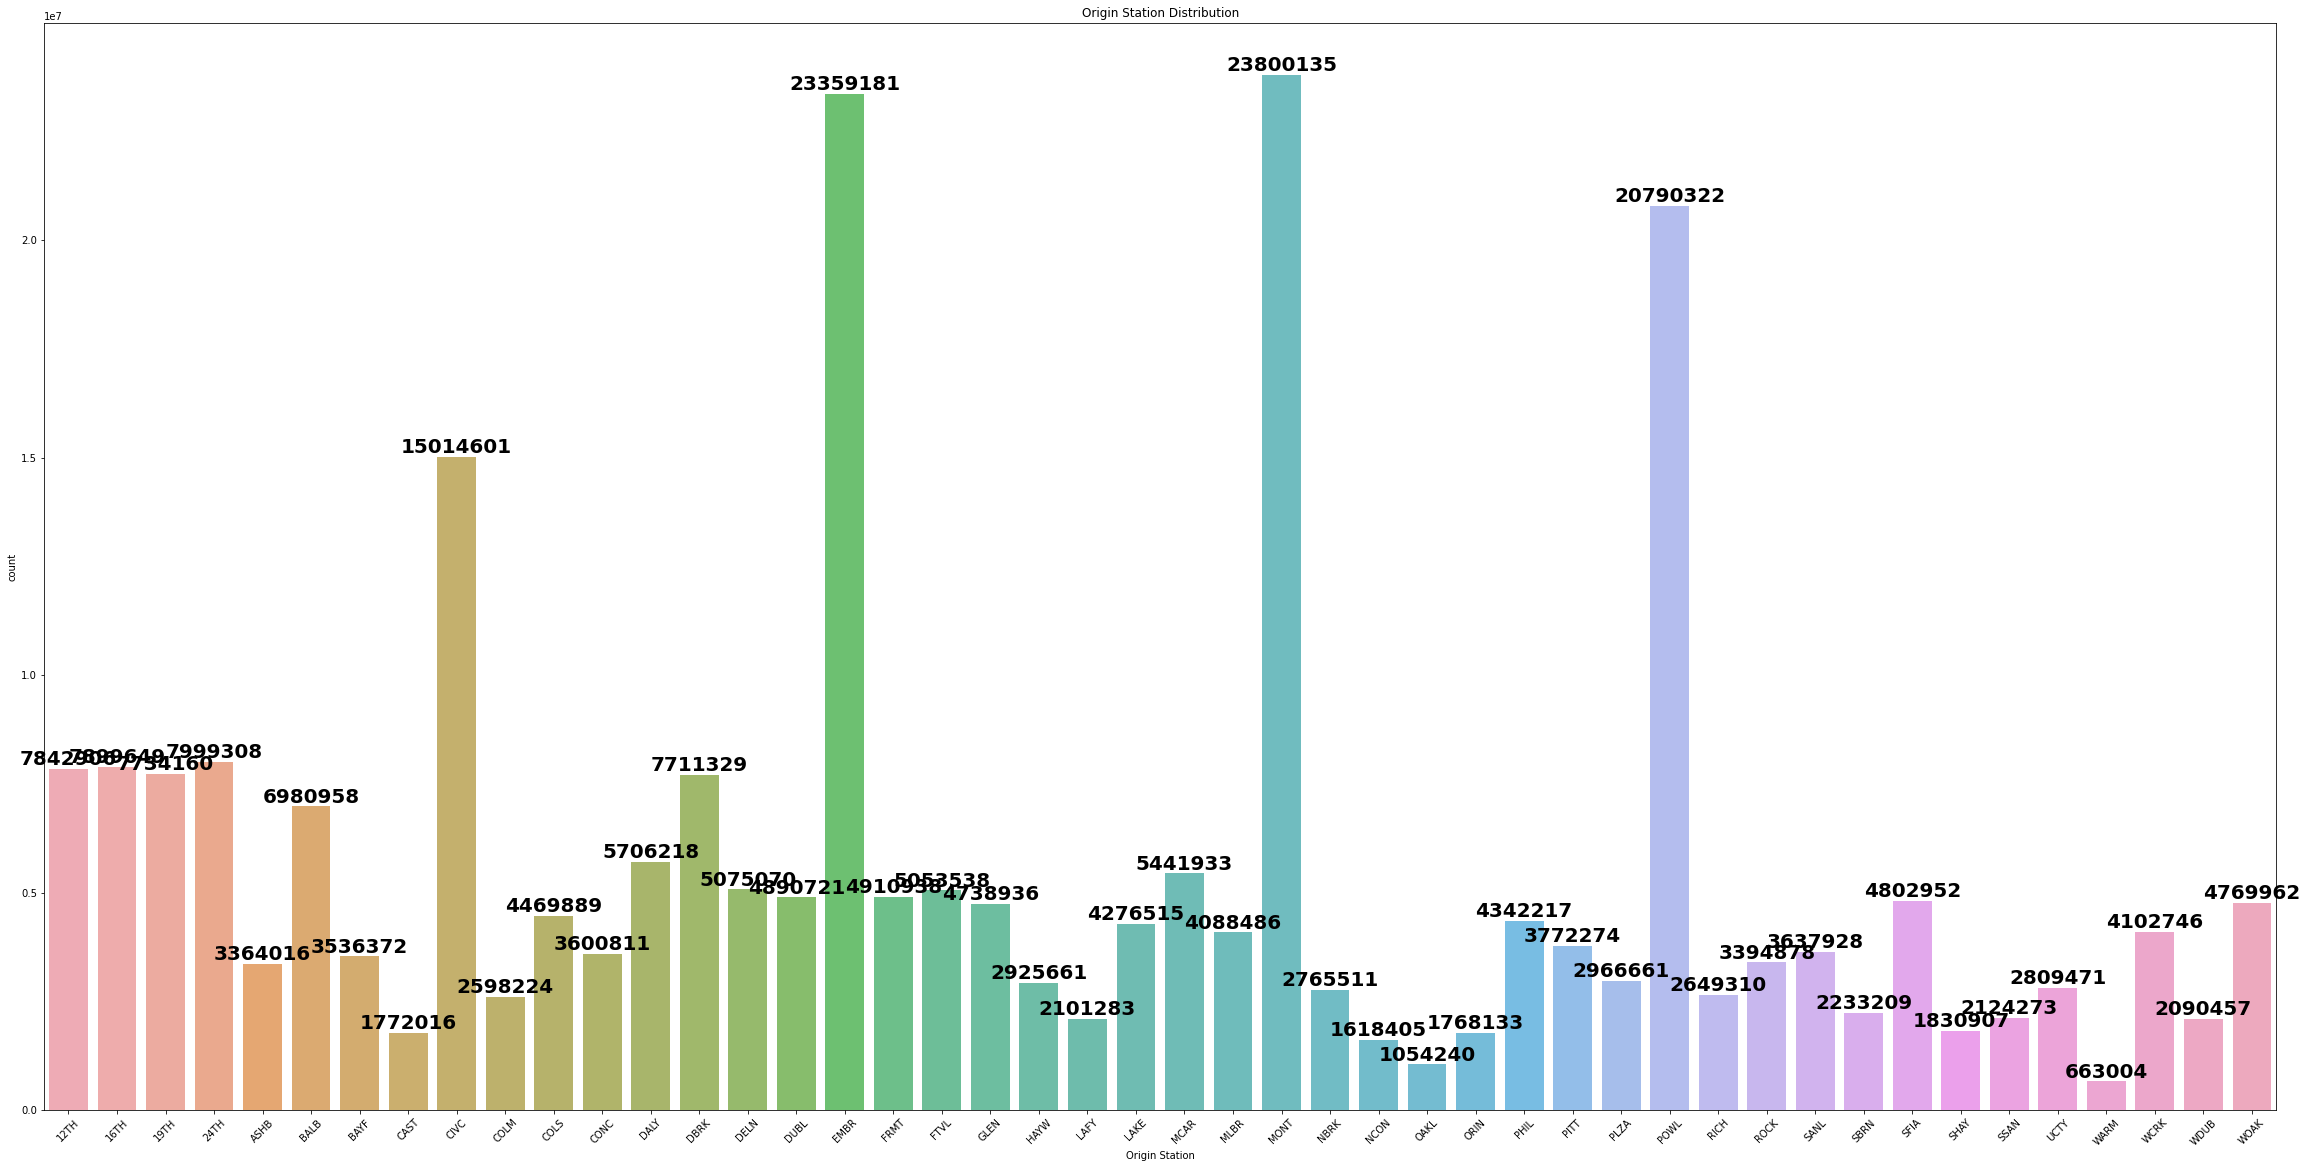

In [14]:
x=df['Origin Station'].value_counts()
x=x.sort_index()
plt.figure(figsize=(40,20))
ax= sns.barplot(x.index, result["Trip Count"], alpha=0.8)

plt.title("Origin Station Distribution")
plt.ylabel('count')
plt.xlabel('Origin Station')

rects = ax.patches
labels = result["Trip Count"]

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(rotation=45);
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 30, label, ha='center', va='bottom')
plt.show();

## Least Popular Route

In [15]:
popular_route=df.groupby('route')["Trip Count"].sum()
type(popular_route)

pandas.core.series.Series

In [16]:
result2 = pd.DataFrame(popular_route) 
result2.sort_values("Trip Count")

,Trip Count
route,
WARM-MLBR,268
MLBR-WARM,302
WARM-COLM,319
WARM-SBRN,366
COLM-WARM,463
...,...
POWL-24TH,1336889
DUBL-EMBR,1351861
BALB-POWL,1370588


## Busiest Hour

In [17]:
time=df.groupby('Hour')["Trip Count"].sum()

In [18]:
result3 = pd.DataFrame(time) 
result3.sort_values("Trip Count")

,Trip Count
Hour,
3,10195
2,39659
4,374944
1,410470
0,2221267
5,2747284
23,4420376
22,5831246
21,6774216


 ## Which day of the week is the busiest? 

In [19]:
df['Date'] = pd.to_datetime(df['Date']) 
df['dayOfWeek'] = df['Date'].dt.day_name() 

In [20]:
busy_day=df.groupby('dayOfWeek')["Trip Count"].sum()
type(busy_day)

pandas.core.series.Series

In [21]:
result3 = pd.DataFrame(busy_day) 
result3.sort_values("Trip Count",ascending=False)

,Trip Count
dayOfWeek,
Wednesday,45185430
Thursday,44821062
Tuesday,44458845
Friday,42191061
Monday,39849993
Saturday,20055208
Sunday,14518115


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


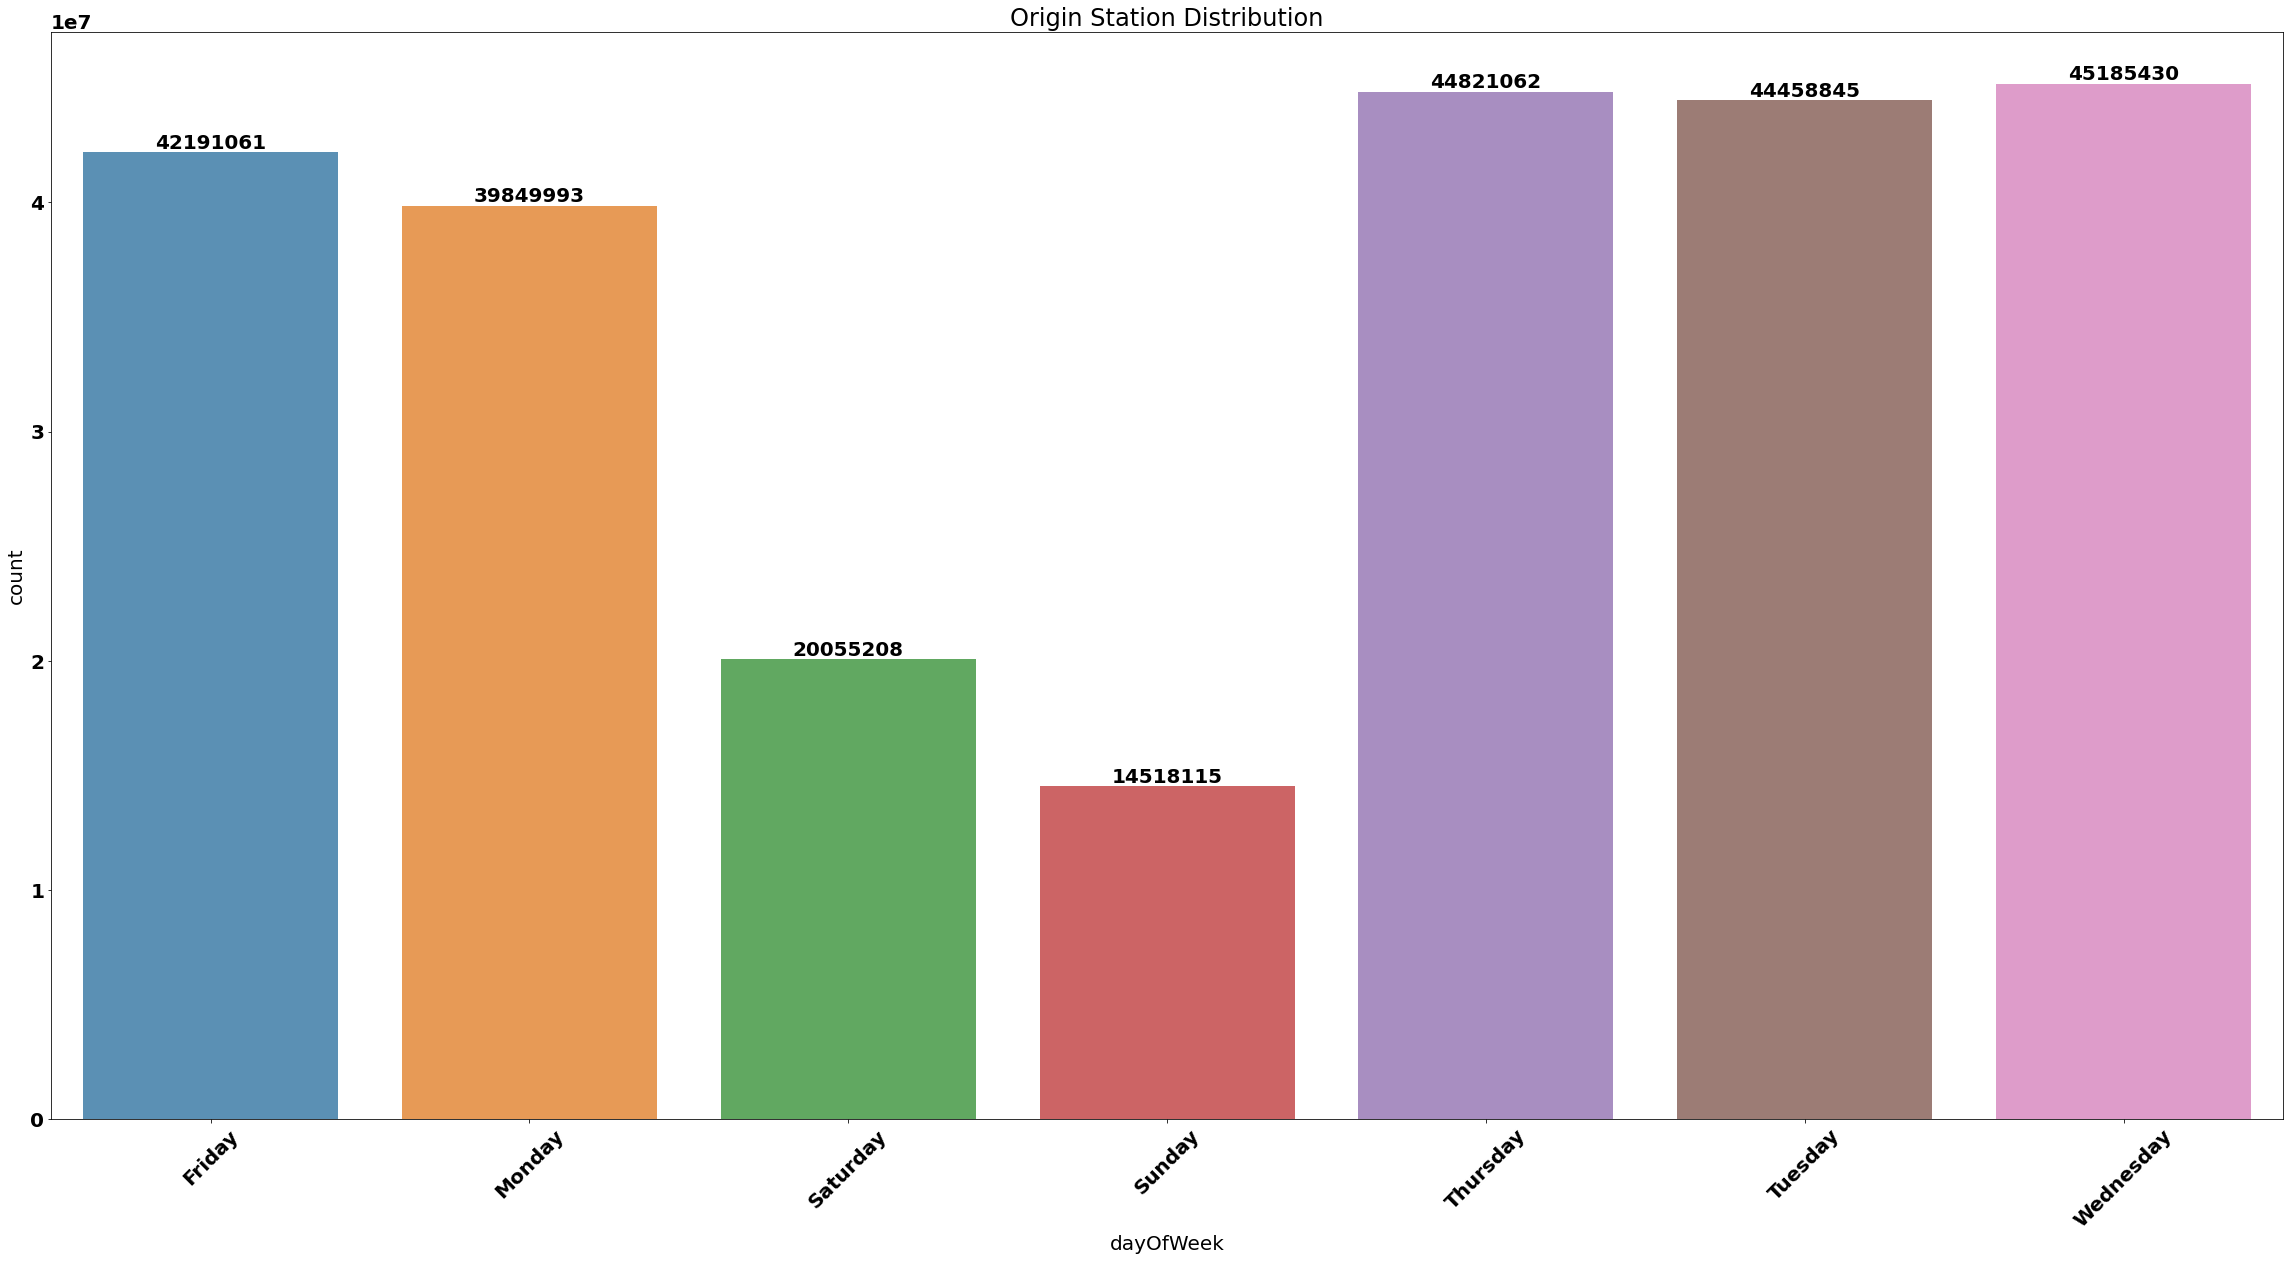

In [22]:
x=df['dayOfWeek'].value_counts()
x=x.sort_index()
plt.figure(figsize=(40,20))
ax= sns.barplot(x.index, result3["Trip Count"], alpha=0.8)

plt.title("Origin Station Distribution")
plt.ylabel('count')
plt.xlabel('dayOfWeek')

rects = ax.patches
labels = result3["Trip Count"]

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(rotation=45);
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 30, label, ha='center', va='bottom')
plt.show();

## Line Distance Between Every Station

In [23]:
#To calculate the distance between each station 
#we will use haversine distance by numpy
#First we need to seperate the locations as latitude and longitude

sentiment_series = location['Location'].tolist()
sentiment_series

['-122.271450,37.803768,0',
 '-122.419694,37.765062,0',
 '-122.268602,37.808350,0',
 '-122.418143,37.752470,0',
 '-122.270062,37.852803,0',
 '-122.447506,37.721585,0',
 '-122.126514,37.696924,0',
 '-122.075602,37.690746,0',
 '-122.414123,37.779732,0',
 '-122.196869,37.753661,0',
 '-122.466233,37.684638,0',
 '-122.029095,37.973737,0',
 '-122.469081,37.706121,0',
 '-122.268133,37.870104,0',
 '-122.316794,37.925086,0',
 '-121.899179,37.701687,0',
 '-122.397020,37.792874,0',
 '-121.976608,37.557465,0',
 '-122.224175,37.774836,0',
 '-122.433817,37.733064,0',
 '-122.087018,37.669723,0',
 '-122.124630,37.893176,0',
 '-122.265180,37.797027,0',
 '-122.267040,37.829065,0',
 '-122.386702,37.600271,0',
 '-122.401066,37.789405,0',
 '-122.283440,37.873967,0',
 '-122.024653,38.003193,0',
 '-122.212191,37.713238,0',
 '-122.183791,37.878361,0',
 '-122.056012,37.928468,0',
 '-121.945154,38.018914,0',
 '-122.298904,37.902632,0',
 '-122.407974,37.784471,0',
 '-122.353099,37.936853,0',
 '-122.251371,37.844

In [24]:
long=[]
lat=[]
for i in range(len(sentiment_series)):
    b=sentiment_series[i].split(",")
    long.append(b[0])
    lat.append(b[1])
    
location['longitude']=long   
location['latitude']=lat

#create two columns for latitude and longitude

In [25]:
location.drop('Location', inplace=True, axis=1)

In [26]:
#to make the visualization simpler we only select the values we will work with

stationsA=location[["Name","longitude","latitude"]]
stationsB=location[["Name","longitude","latitude"]]

In [27]:
#remember: sklearn.neighbors.DistanceMetric.get_metric('haversine') method only works with float values

stationsA[["longitude","latitude"]]=stationsA[["longitude","latitude"]].astype("float")
stationsB[["longitude","latitude"]]=stationsB[["longitude","latitude"]].astype("float")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
#The analysis requires the latitude and longitude to be in radians 
#so we add these columns to the dataframe using np.radians.

import numpy as np
stationsA[['lat_radians_A','long_radians_A']] = np.radians(stationsA[['latitude','longitude']])
stationsB[['lat_radians_B','long_radians_B']] = np.radians(stationsB[['latitude','longitude']])

In [29]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

dist_matrix = (dist.pairwise
    (stationsA[['lat_radians_A','long_radians_A']],stationsB[['lat_radians_B','long_radians_B']])*6371)

# Note that 6371 is the radius of the earth in kilometers

df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=stationsA['Name'], 
                 columns=stationsB['Name'])
)

In [30]:
df_dist_matrix

Name,12th St. Oakland City Center (12TH),16th St. Mission (16TH),19th St. Oakland (19TH),24th St. Mission (24TH),Ashby (ASHB),Balboa Park (BALB),Bay Fair (BAYF),Castro Valley (CAST),Civic Center/UN Plaza (CIVC),Coliseum/Oakland Airport (COLS),...,San Leandro (SANL),San Bruno (SBRN),San Francisco Int'l Airport (SFIA),South Hayward (SHAY),South San Francisco (SSAN),Union City (UCTY),Warm Springs/South Fremont (WARM),Walnut Creek (WCRK),West Dublin/Pleasanton (WDUB),West Oakland (WOAK)
Name,,,,,,,,,,,,,,,,,,,,,
12th St. Oakland City Center (12TH),0.000000,13.720175,0.567617,14.097927,5.453806,17.972899,17.421986,21.318066,12.818548,8.602724,...,13.315746,22.428251,23.437267,26.644817,21.698728,32.578345,44.493097,21.179219,32.315075,2.084928
16th St. Mission (16TH),13.720175,0.000000,14.123076,1.406790,16.370223,5.417745,26.873362,31.369785,1.703137,19.629420,...,23.259691,14.158399,16.751655,35.047867,11.411739,40.370112,51.419301,34.647001,43.824988,11.806930
19th St. Oakland (19TH),0.567617,14.123076,0.000000,14.537177,4.944611,18.449743,17.594397,21.423040,13.176704,8.759155,...,13.491787,22.989786,24.004818,26.832791,22.238484,32.780913,44.714838,20.697326,32.267711,2.363310
24th St. Mission (24TH),14.097927,1.406790,14.537177,0.000000,17.138578,4.296647,26.382151,30.899845,3.051922,19.454198,...,22.878946,12.756104,15.346553,34.367219,10.069632,39.597423,50.525350,35.183337,43.483323,12.280671
Ashby (ASHB),5.453806,16.370223,4.944611,17.138578,0.000000,21.355016,21.438504,24.836544,15.038489,12.762538,...,17.430801,27.148960,28.448090,30.663606,25.948183,36.657191,48.655719,18.717531,34.527755,5.766857
Balboa Park (BALB),17.972899,5.417745,18.449743,4.296647,21.355016,0.000000,28.370186,32.896601,7.100637,22.326582,...,25.213150,9.717283,12.706137,35.692841,6.383547,40.567612,50.980852,39.147064,45.742854,16.283721
Bay Fair (BAYF),17.421986,26.873362,17.594397,26.382151,21.438504,28.370186,0.000000,4.531980,26.914792,8.836838,...,4.106354,26.340207,25.078559,9.252500,28.171545,15.232015,27.220506,23.766972,17.447384,19.075498
Castro Valley (CAST),21.318066,31.369785,21.423040,30.899845,24.836544,32.896601,4.531980,0.000000,31.370282,12.755491,...,8.262625,30.561191,29.103355,6.474328,32.551621,12.255757,24.163189,23.892538,13.004394,23.100389
Civic Center/UN Plaza (CIVC),12.818548,1.703137,13.176704,3.051922,15.038489,7.100637,26.914792,31.370282,0.000000,19.315585,...,23.176677,15.787603,18.309889,35.315771,13.106973,40.754963,51.965033,33.495000,43.640710,10.822348


In [31]:
# Unpivot this dataframe from wide format to long format.
# When you unpivot, the data in the pivot table becomes a
# column named 'value'. Rename this column to 'km' for clarity.
df_dist_long = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='Name')
)
df_dist_long = df_dist_long.rename(columns={'value':'km'})

In [32]:
df_dist_long

,Name,Name,km
0,12th St. Oakland City Center (12TH),12th St. Oakland City Center (12TH),0.000000
1,12th St. Oakland City Center (12TH),12th St. Oakland City Center (12TH),13.720175
2,12th St. Oakland City Center (12TH),12th St. Oakland City Center (12TH),0.567617
3,12th St. Oakland City Center (12TH),12th St. Oakland City Center (12TH),14.097927
4,12th St. Oakland City Center (12TH),12th St. Oakland City Center (12TH),5.453806
...,...,...,...
2111,West Oakland (WOAK),West Oakland (WOAK),34.127705
2112,West Oakland (WOAK),West Oakland (WOAK),45.980238
2113,West Oakland (WOAK),West Oakland (WOAK),22.903966
2114,West Oakland (WOAK),West Oakland (WOAK),34.309405


## GeoPandas

In [33]:
#pip install geopandas

In [40]:
import descartes
import geopandas as gpd

In [41]:
street_map=gpd.read_file("map3.png")

DriverError: 'map3.png' not recognized as a supported file format.